# Monte Carlo simulation to estimate the value of $\pi$
### Noah Chavez 9/27/2023

Consider a square in the $x$-$y$ plane with verticies at $(0,0)$, $(r,0)$, $(0,r)$, $(r,r)$. Its area is given by $A_{\text{square}}=r^2$. Now, a circle with radius, $r$, centered at the origin has a total area of $A_{\text{circle}}=\pi r^2$. However, just in the first quadrant we have only a quarter of this area so the area of the circle that overlaps with the square is $A_{\text{circle}}=\frac{1}{4} \pi r^2$. It then follows that the ratio of the areas is $\frac{A_{\text{circle}}}{A_{\text{square}}} = \frac{\frac{1}{4} \pi r^2}{r^2} = \frac{\pi}{4}$. 

We can use a Monte Carlo method to approximate the value of $\pi$ by randomly sampling points within the square and finding the ratio that fall into the circle (and square) vs the *whole* square, and then multiplying by $4$.

In [1]:
import random
import math

#__________________________________________________________________________________________________________________________
#Creates a random point inside of a square of length r whose bottom left vertex is the origin. Input: r, length of square
def randomPoint(r: float) -> tuple:
    xCoord = random.uniform(0,r) #uniform is inclusive
    yCoord = random.uniform(0,r)
    return (xCoord, yCoord)
#__________________________________________________________________________________________________________________________

#__________________________________________________________________________________________________________________________   
#A function to estimate pi using a monte carlo method. Input: n, the number of random points to sample
def estimatePi(n: int) -> float:
    #sample many points at random in the r by r square
    sampledPoints = [randomPoint(1) for i in range(n)]

    #calculate number of points "inside" the circle . . .
    insideCount = 0
    for point in sampledPoints:
        distance = math.sqrt(math.pow(point[0],2) + math.pow(point[1],2)) #Euclidean distance
        if(distance <= 1):
            insideCount += 1

    #. . . and now calculate the ratio between points inside the circle and the whole square
    mcAreaRatio = insideCount / n

    #return value of pi
    mcPi = mcAreaRatio * 4
    return mcPi
#__________________________________________________________________________________________________________________________

pi = estimatePi(10000000)
print("Approximating pi as: %s" % pi)

Approximating pi as: 3.1410768


It would be cool to plot the estimated value of pi as the number of points sampled increases

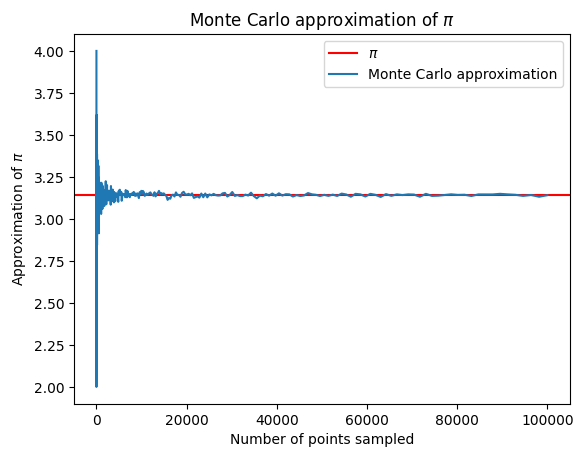

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#estimate pi for 10E1 sample points up to 10E5, 500 times, logarithmically spaced
logSpace = np.logspace(1,5,500)
n = [int(logSpace[i]) for i in range(logSpace.size)]
pi = [estimatePi(sampleSize) for sampleSize in n]

#plot it
plt.xlabel("Number of points sampled")
plt.ylabel("Approximation of $\pi$")
plt.title("Monte Carlo approximation of $\pi$")
plt.axhline(y=math.pi, color='r', linestyle='-', label="$\pi$")
plt.plot(n,pi, label="Monte Carlo approximation")
plt.legend()
plt.show()

So the approximation converges to a reasonable value for $\pi$ quickly. 